## Introduction:

Electromagnetic radiation inside a perfectly conducting cavity cannot take arbitrary forms. The conducting walls impose boundary conditions on the electric and magnetic fields, forcing them to form standing-wave patterns known as cavity modes.

Each allowed mode is characterised by three integers:

$$ (n_x, n_y, n_z) \in \mathbb{Z}^3, \quad n_x, n_y, n_z \ge 1 $$


These integers represent the number of half-wavelengths that fit along the x, y, and z directions of the cavity. Because only whole numbers of half-wavelengths can fit inside the box, the allowed wavelengths — and therefore the allowed frequencies — become quantized.



## Physics Background:

For a rectangular cavity with side lengths:

$$ L_x, L_y, L_z $$

the frequency of a mode is given by:

$$ f = \frac{c}{2} \sqrt{(\frac{n_x}{L_x})^2 + (\frac{n_y}{L_y})^2 + (\frac{n_z}{L_z})^2} $$

This equation shows that the frequency depends on the combined contribution of all three spatial components.

Conceptually, this can be written as: 

$$ f \propto \sqrt{n^2_x + n^2_y + n^2_z} $$

Each allowed mode therefore corresponds to a point in a three-dimensional integer lattice defined by $ (n_x, n_y, n_z) $

Counting all modes with frequency less than or equal to $f$ is equivalent to counting all integer lattice points inside a sphere of radius proportional to $f$. The number of lattice points inside a sphere scales with its volume:

$$ V \propto R^3 $$

Since $R \propto f$ it follows that $N(f) \propto f^3$



## Objective:

The objective of this investigation is to numerically compute the total number of electromagnetic cavity modes below a given frequency $f$ and to verify that the mode count follows the theoretical prediction:

$$ N(f) \propto f^3 $$



## Mathematics:

Assume that: 

$$
N(f) \propto f^3 \implies N(f) = Af^3
$$
where A is some constant (depends on box volume, c, polarization factor, etc.)

Then, take log of both sides:
$$
\log{N} = \log{Af^3}
$$
simplifies to:
$$
\log{N} = 3\log{f} + \log{A}
$$

Plotting $y = \log(N)$ vs $x = \log(f)$ will give the equation:
$$
y = 3x + \log{A}
$$
which is a straight line with slope 3



## Computation:

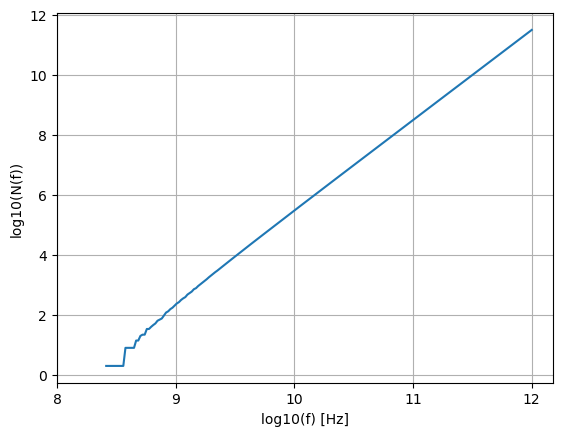

Best-fit slope m = 3.106 (should be ~3 for f^3)


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("/Users/jayan/Documents/coding/projects")
from math import sqrt,floor,log10
from constants import SPEED_OF_LIGHT_M_S

c = float(SPEED_OF_LIGHT_M_S)


def mode_count(length_x, length_y, length_z, f):
    radius = float(2 * f / c) #ellipsoid radius
    count = 0 #counting modes
    upper_n_x = floor(length_x * radius)

    for i in range(1,upper_n_x + 1):
        rem_x = radius ** 2 - (i / length_x) ** 2
        if rem_x <= 0:
            continue

        upper_n_y = floor(length_y * sqrt(rem_x))

        for j in range(1,upper_n_y + 1):
            rem_x_y = rem_x - (j / length_y) ** 2
            if rem_x_y <= 0:
                continue

            upper_n_z = floor(length_z * sqrt(rem_x_y))
            if upper_n_z >= 1:
                count += upper_n_z
    return 2 * count


def graph(length_x, length_y, length_z, fmode_max, num_points):
    f_min = (c / 2.0) * sqrt(1/length_x**2 + 1/length_y**2 + 1/length_z**2)

    f_values = np.logspace(np.log10(f_min*1.000001), np.log10(fmode_max), num_points)
    N_values = np.array([mode_count(length_x, length_y, length_z, f) for f in f_values])

    # avoid log10(0) just in case
    mask = N_values > 0
    x = np.log10(f_values[mask])
    y = np.log10(N_values[mask])

    plt.plot(x, y)
    plt.xlabel("log10(f) [Hz]")
    plt.ylabel("log10(N(f))")

    # ticks like 8, 9, 10, 11, 12
    plt.xticks(np.arange(np.floor(x.min()), np.ceil(x.max()) + 1, 1))
    plt.grid(True)
    plt.show()
    
    m, b = np.polyfit(x, y, 1)
    print(f"Best-fit slope m = {m:.3f} (should be ~3 for f^3)")




graph(1, 1, 1, 1e12, 200)



## Results
Using the numerical function call: 
```python
graph(1, 1, 1, 1e12, 200)
```
a log-log plot of  $\log_{10} N(f)$  vs  $\log_{10} f$  was produced.
The resulting graph is approximately linear over most of the frequency range. A linear fit to the data yielded a slope of:
$$ m = 3.106 $$



## Interpretation of the Results

From the theoretical derivation, we expect $N(f) \propto f^3$. Taking logarithms gives $\log N = 3\log f + \log A$. This predicts that the slope of the log-log plot should be 3.
The numerical result $m = 3.106$ is close to the expected value. However, the small deviation from 3 by 0.106 is due to the discrete nature of the cavity spectrum.

The theoretical cubic relationship assumes that the number of integer lattice points inside a sphere can be approximated by the volume of that sphere. However, the exact mode count is not perfectly smooth. The true expansion of the mode count can be written as:

$$ N(f) = Af^3 + Bf^2 + Cf + ... $$

The additional lower-order terms arise from finite-size effects and boundary corrections. When fitting over a finite frequency range, these terms slightly modify the measured slope.
At higher frequencies, the cubic term dominates and the slope approaches 3 more closely. This reflects the transition from a discrete spectrum to the continuum approximation.



## Conclusion

This numerical investigation confirms that the number of electromagnetic cavity modes below a frequency $f$ scales approximately as $f^3$.

The cubic scaling arises from the geometry of three-dimensional space. Each allowed mode corresponds to an integer point in $n_x,n_y,n_z$ space, and counting modes below a given frequency is equivalent to counting lattice points inside a sphere. Since the volume of a sphere scales as $R^3$ and $R \propto f$ the total number of modes scales as $f^3$.

The measured slope $m = 3.106$ is in strong agreement with the theoretical prediction. The small deviation from 3 is explained by discreteness and finite-size corrections rather than a breakdown of the underlying theory.

This result numerically reproduces the geometric argument underlying the electromagnetic density of states, which forms the foundation of blackbody radiation theory and statistical mechanics.



